<a href="https://colab.research.google.com/github/AryaJeet1364/QuantumComputing/blob/main/MultiQubitGates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installations

In [1]:
!pip install qiskit -q
!pip install qiskit[visualization] -q
import qiskit as qk

!pip install qiskit-aer -q
import qiskit_aer as qk_aer

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import qiskit as qk
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from IPython.display import display

In [3]:
def show_results(qc):
  # Display the circuit (matplotlib style with Clifford gates)
  display(qc.draw('mpl', style='clifford', scale=1))

  # Setup simulator backend
  backend = AerSimulator()

  # Transpile the circuit for the backend
  qc_exe = qk.transpile(qc, backend)

  # Run the circuit on the simulator with 1000 shots
  result = backend.run(qc_exe, shots=1000).result()
  counts = result.get_counts()

  # Print the measurement results
  print("Measurement results:", counts)

  # Plot and display the histogram of results
  fig = plot_histogram(counts)
  display(fig)

CNOT

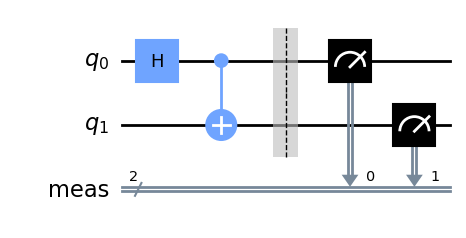

Measurement results: {'00': 495, '11': 505}


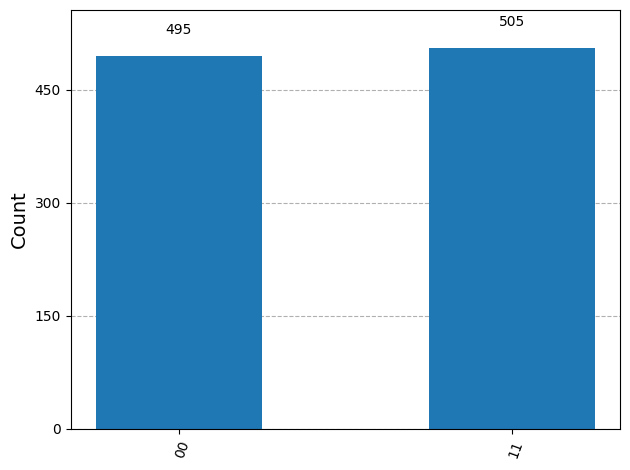

In [4]:
qc = qk.QuantumCircuit(2)

qc.h(0)          # Apply Hadamard gate on qubit 0
                 # Creates superposition: (|0> + |1>) / sqrt(2)

qc.cx(0, 1)      # Apply CNOT with qubit 0 as control and qubit 1 as target
                 # If qubit 0 = |1>, flips qubit 1
                 # State becomes the entangled Bell state:
                 # (|00> + |11>) / sqrt(2)

qc.measure_all() # Measure both qubits in computational basis
                 # Measurement will collapse the state to either |00> or |11> with equal probability

show_results(qc) # Run and display measurement results and histogram

CZ

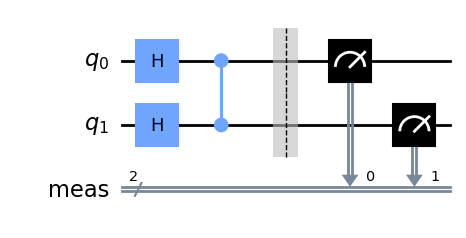

Measurement results: {'11': 260, '01': 244, '10': 256, '00': 240}


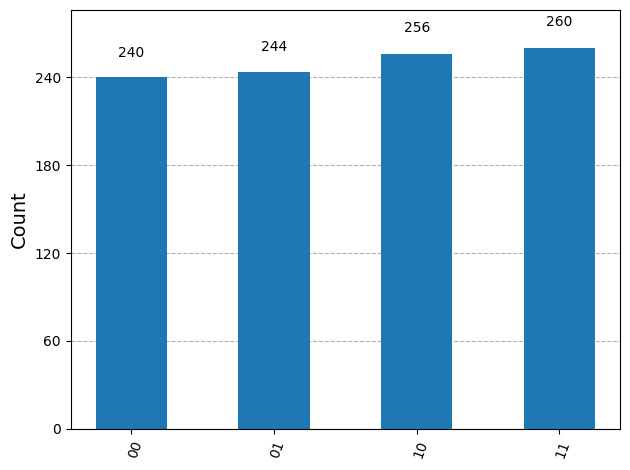

In [5]:
qc = qk.QuantumCircuit(2)

qc.h(0)          # Apply Hadamard gate to qubit 0
                 # Creates superposition: (|0> + |1>) / sqrt(2)

qc.h(1)          # Apply Hadamard gate to qubit 1
                 # Creates superposition: (|0> + |1>) / sqrt(2)

                 # Overall state after both Hadamards:
                 # (|00> + |01> + |10> + |11>) / 2

qc.cz(0, 1)      # Controlled-Z gate applies a phase flip (-1) to |11> only
                 # State becomes:
                 # (|00> + |01> + |10> - |11>) / 2

qc.measure_all() # Measure both qubits in computational basis
                 # The measurement probabilities are equal for all four states,
                 # but the CZ gate introduces a relative phase on |11>

show_results(qc) # Run and display measurement results and histogram

SWAP

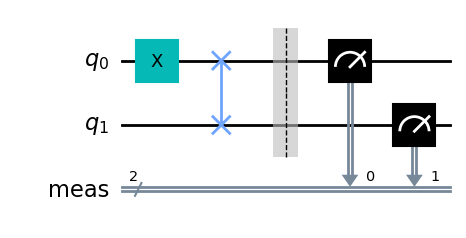

Measurement results: {'10': 1000}


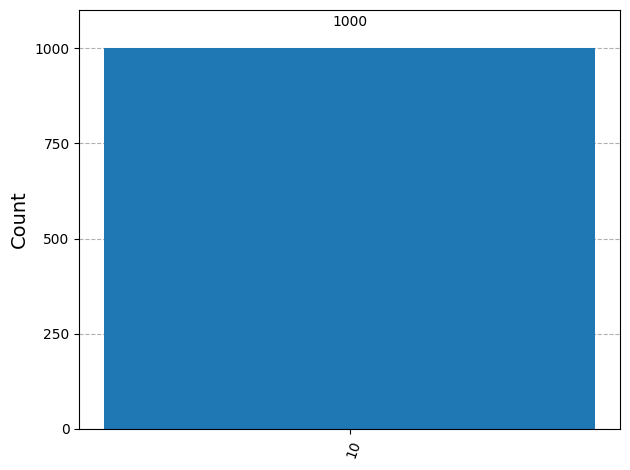

In [6]:
qc = qk.QuantumCircuit(2)

qc.x(0)          # Flip qubit 0 from |0> to |1>
                 # Initial state changes from |00> to |10>

qc.swap(0, 1)    # Apply SWAP gate between qubit 0 and qubit 1
                 # SWAP exchanges the states of the two qubits:
                 # |10> becomes |01>

qc.measure_all() # Measure both qubits in computational basis
                 # Measurement returns classical bits for each qubit
                 # Qiskit bitstring order: left bit = qubit 1, right bit = qubit 0

show_results(qc) # Run simulation and display measurement results and histogram


iSWAP

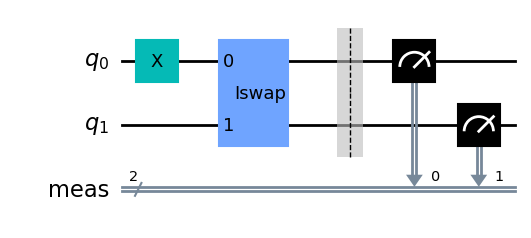

Measurement results: {'10': 1000}


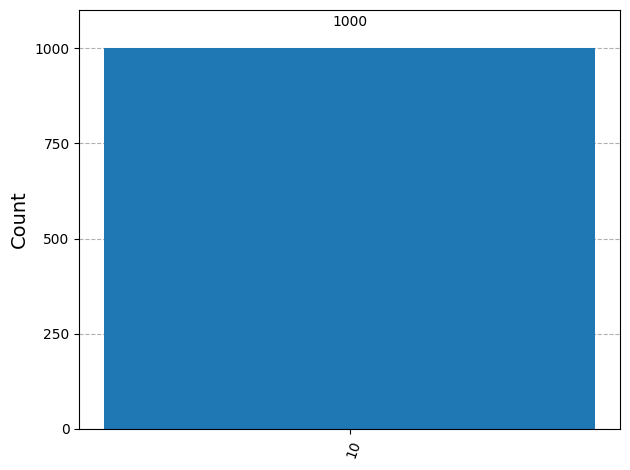

In [7]:
qc = qk.QuantumCircuit(2)

qc.x(0)          # Flip qubit 0 from |0> to |1>
                 # Initial state changes from |00> to |10>

qc.iswap(0, 1)   # Apply iSWAP gate between qubit 0 and qubit 1
                 # iSWAP swaps the states of the two qubits and adds a phase i to the swapped terms
                 # Since initial state is |10>, it transforms to i|01>
                 # Note: Global phase 'i' does not affect measurement outcomes
                 # Final state before measurement: i|01>

qc.measure_all() # Measure both qubits

show_results(qc)  # Result: always '10' (qubit1=1, qubit0=0)


CP (Controlled Phase)

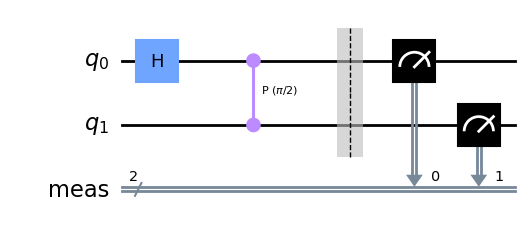

Measurement results: {'00': 503, '01': 497}


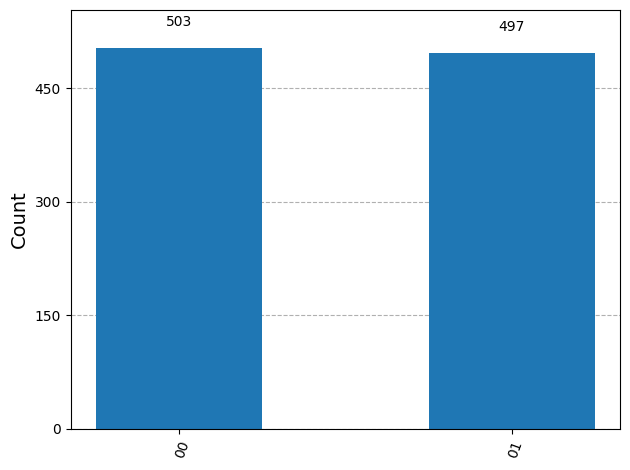

In [8]:
from numpy import pi

qc = qk.QuantumCircuit(2)

qc.h(0)              # Apply Hadamard gate to qubit 0
                      # Creates superposition: (|0> + |1>) / sqrt(2)
                      # Overall state: (|00> + |10>) / sqrt(2) — qubit 1 is initially |0>

qc.cp(pi/2, 0, 1)    # Controlled Phase (CP) gate with angle π/2:
                      # If qubit 0 (control) is |1>, apply phase rotation of e^(i * π/2) on qubit 1 (target)
                      # This adds a phase of i to the |10> component, leaving |00> unchanged

qc.measure_all()     # Measure both qubits in computational basis

show_results(qc)     # Run and display measurement results and histogram

CRX, CRY, CRZ

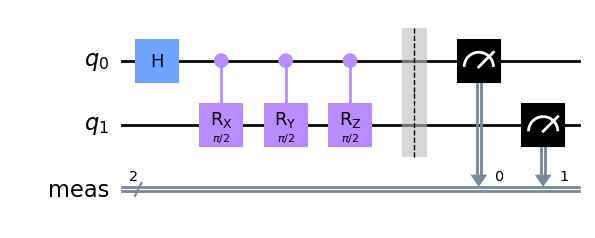

Measurement results: {'11': 251, '00': 516, '01': 233}


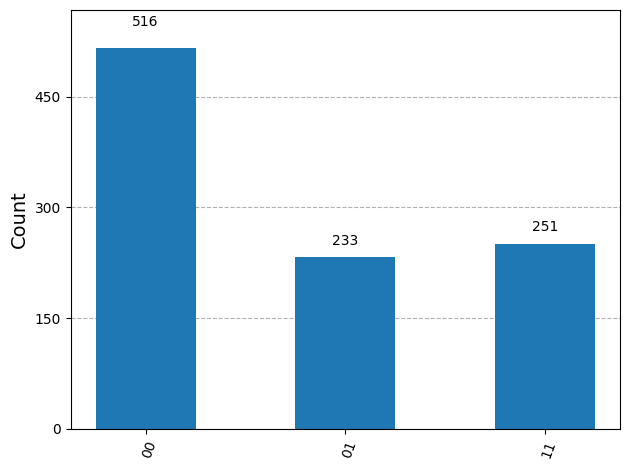

In [9]:
from numpy import pi

qc = qk.QuantumCircuit(2)

qc.h(0)                  # Apply Hadamard gate on qubit 0
                         # Creates superposition: |q0> = (|0> + |1>) / sqrt(2)
                         # Initial state: |q0 q1> = (|0> + |1>)/√2 ⊗ |0> = (|00> + |10>)/√2

qc.crx(pi/2, 0, 1)      # Controlled-RX rotation on qubit 1 by π/2, controlled by qubit 0
                         # When qubit 0 = |1>, rotate qubit 1 around X-axis by π/2

qc.cry(pi/2, 0, 1)      # Controlled-RY rotation on qubit 1 by π/2, controlled by qubit 0
                         # When qubit 0 = |1>, rotate qubit 1 around Y-axis by π/2

qc.crz(pi/2, 0, 1)      # Controlled-RZ rotation on qubit 1 by π/2, controlled by qubit 0
                         # When qubit 0 = |1>, rotate qubit 1 around Z-axis by π/2

qc.measure_all()        # Measure both qubits in computational basis

show_results(qc)        # Run and display measurement results and histogram

Toffoli (CCX)

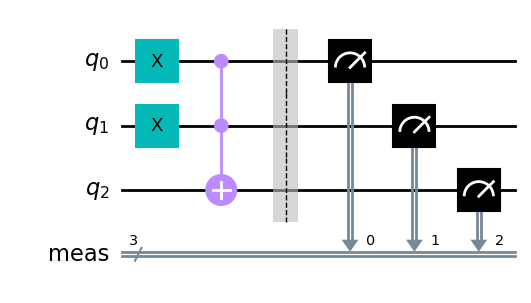

Measurement results: {'111': 1000}


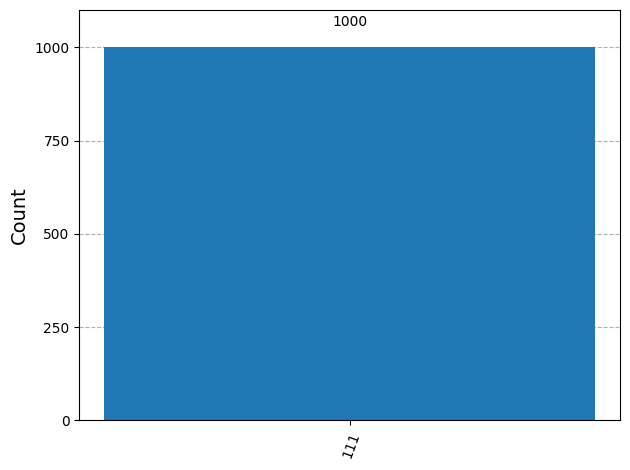

In [10]:
qc = qk.QuantumCircuit(3)    # Create a quantum circuit with 3 qubits

qc.x(0)                      # Apply X gate (NOT) on qubit 0 — flips |0> to |1>
qc.x(1)                      # Apply X gate on qubit 1 — flips |0> to |1>

qc.ccx(0, 1, 2)              # Toffoli gate (CCX): flips qubit 2 **only if** qubits 0 AND 1 are |1>
                             # Since qubit 0 and 1 are both |1>, qubit 2 flips from |0> to |1>

qc.measure_all()             # Measure all qubits in the computational basis

show_results(qc)             # Run the circuit on simulator, display results and histogram

CSWAP

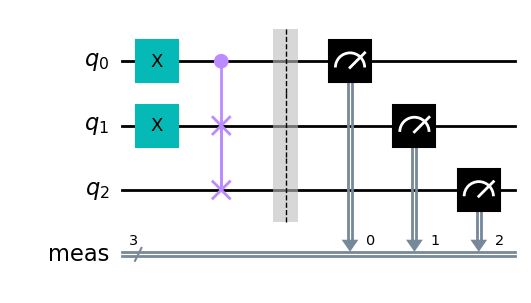

Measurement results: {'101': 1000}


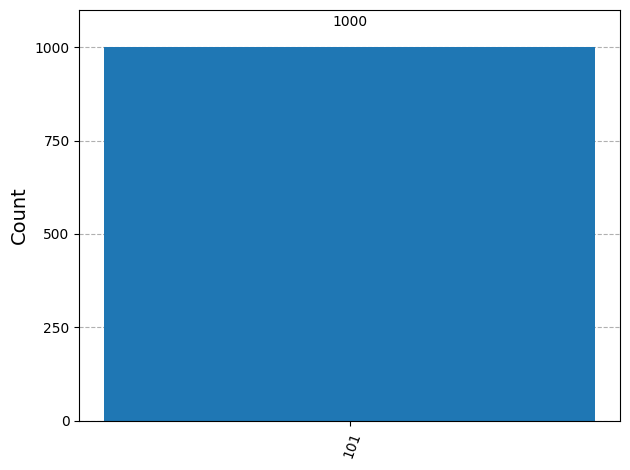

In [11]:
qc = qk.QuantumCircuit(3)

qc.x(0)          # Flip qubit 0 to |1> — this is the control qubit for the CSWAP gate
qc.x(1)          # Flip qubit 1 to |1> — first target qubit of the CSWAP gate
                  # Initial state: |q0 q1 q2> = |1 1 0>

qc.cswap(0, 1, 2)  # Controlled-SWAP (Fredkin) gate:
                   # If control qubit 0 is |1>, swap the states of qubit 1 and qubit 2
                   # Since control qubit 0 = |1>, swap qubit 1 and qubit 2
                   # After swap: state becomes |1 0 1>

qc.measure_all()   # Measure all qubits in the computational basis

show_results(qc)   # Run circuit on simulator and show measurement results and histogram